In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat


In [2]:
df = pd.read_csv("/home/rodolfoch/Computacional/Actividad7/mayjunstb.csv")

In [3]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2016-05-01 00:00,1.180,0.012,0,0
1,2016-05-01 01:00,1.230,0.022,0,0
2,2016-05-01 02:00,1.262,0.016,0,0
3,2016-05-01 03:00,1.178,0.018,0,0
4,2016-05-01 04:00,1.046,0.015,0,0


In [4]:
df.dtypes

Date Time        object
 Water Level    float64
 Sigma          float64
 I                int64
 L                int64
dtype: object

In [5]:
df.tail()

,Date Time,Water Level,Sigma,I,L
2203,2016-07-31 19:00,0.991,0.007,0,0
2204,2016-07-31 20:00,0.769,0.009,0,0
2205,2016-07-31 21:00,0.719,0.005,0,0
2206,2016-07-31 22:00,0.724,0.007,0,0
2207,2016-07-31 23:00,0.925,0.013,0,0


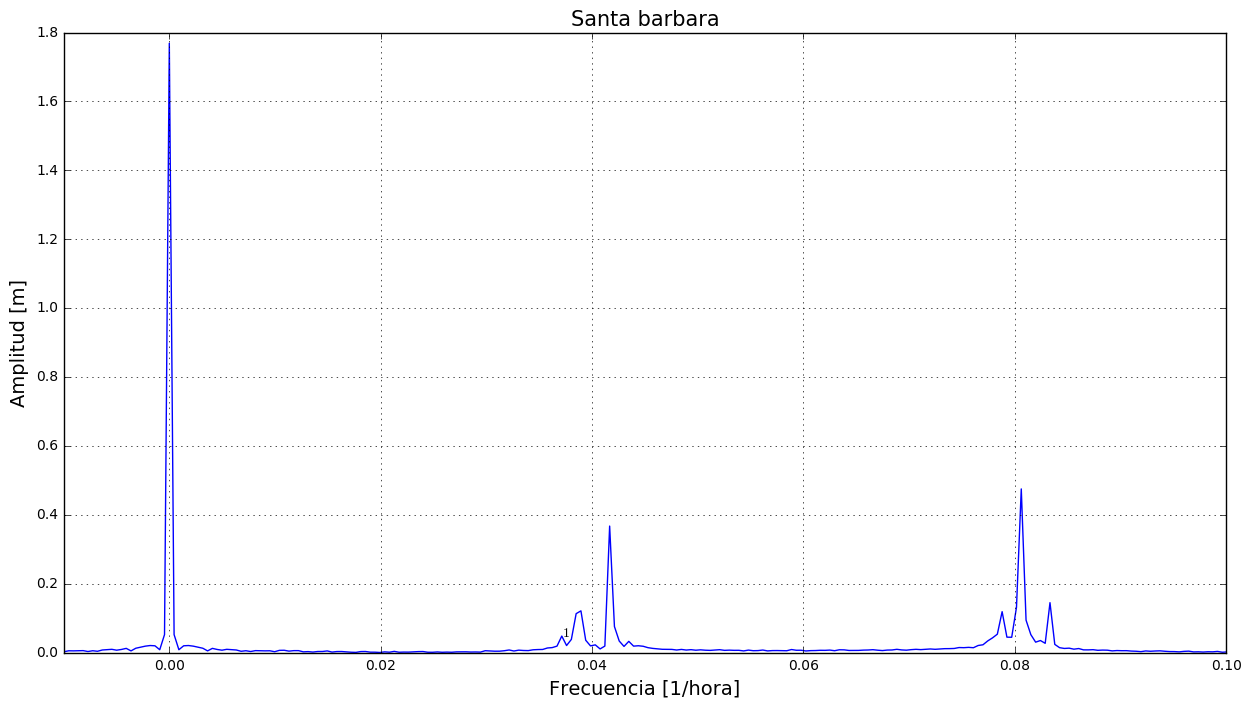

In [6]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N_d = 2208
# Separacion de tiempo entre cada medicion
T_d = 1.0
#aplicacion de la transformada de Fourier
y_hr = df[" Water Level"] 
yf_hr = fft(y_hr)
#Cambio de variable de tiempo a uno de frecuencias.
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot_hr = fftshift(yf_hr)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
graf = plt.plot(xf_hr, 2.0/N_d *abs(yplot_hr), 'b-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Santa barbara', fontsize=15)


#Calando a ver si jala
plt.text(0.0371376811594, 0.0477280435474, '$1$')


fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()




In [7]:
a = 2*np.absolute(yf_hr)/N_d #N_d es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier


In [8]:
print(np.where(a[:,]>0.035)) #### ando con esto
b= a[a[:,]>0.035]
b

(array([   0,    1,   82,   84,   85,   86,   87,   92,   93,  172,  173,
        174,  175,  176,  177,  178,  179,  180,  184, 2024, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2115, 2116, 2121, 2122,
       2123, 2124, 2126, 2207]),)


array([ 1.76899275,  0.05192968,  0.04772804,  0.03798489,  0.11275181,
        0.12088039,  0.03558658,  0.367064  ,  0.07538882,  0.04256561,
        0.05321195,  0.11856555,  0.04454763,  0.04420587,  0.13115144,
        0.47490584,  0.09387962,  0.0518428 ,  0.14471611,  0.14471611,
        0.0518428 ,  0.09387962,  0.47490584,  0.13115144,  0.04420587,
        0.04454763,  0.11856555,  0.05321195,  0.04256561,  0.07538882,
        0.367064  ,  0.03558658,  0.12088039,  0.11275181,  0.03798489,
        0.04772804,  0.05192968])

In [9]:
#L
print( 'Primer Armónico notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[82,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +82),])
print('periodo=', 1/xf_hr[int(N_d/2 +82),])
print()

Primer Armónico notorio
Amplitud= 0.0477280435474
frecuencia= 0.0371376811594
periodo= 26.9268292683



In [10]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N_d = 2208
# Separacion de tiempo entre cada medicion
T_d = 1.0
#aplicacion de la transformada de Fourier
y_hr = df[" Water Level"] 
yf_hr = fft(y_hr)
#Cambio de variable de tiempo a uno de frecuencias.
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot_hr = fftshift(yf_hr)




###Las alturas
A0_m = np.absolute(yf_hr[0,]/N_d)
A1_m = 2.0*np.absolute(yf_hr[1,]/N_d)
A2_m = 2.0*np.absolute(yf_hr[82,]/N_d)
A3_m = 2.0*np.absolute(yf_hr[84,]/N_d)
A4_m = 2.0*np.absolute(yf_hr[85,]/N_d)
A5_m = 2.0*np.absolute(yf_hr[86,]/N_d)
A6_m = 2.0*np.absolute(yf_hr[87,]/N_d)
A7_m = 2.0*np.absolute(yf_hr[92,]/N_d)
A8_m = 2.0*np.absolute(yf_hr[93,]/N_d)
A9_m = 2.0*np.absolute(yf_hr[172,]/N_d)
A10_m = 2.0*np.absolute(yf_hr[173,]/N_d)
A11_m = 2.0*np.absolute(yf_hr[174,]/N_d)





In [11]:
#Periodos ( )
f_A1m = xf_hr[int(1104 +1),]
f_A2m = xf_hr[int(1104 +82),]
f_A3m = xf_hr[int(1104 +84),]
f_A4m = xf_hr[int(1104 +85),]
f_A5m = xf_hr[int(1104 +86),]
f_A6m = xf_hr[int(1104 +87),]
f_A7m = xf_hr[int(1104 +92),]
f_A8m = xf_hr[int(1104 +93),]
f_A9m = xf_hr[int(1104 +172),]
f_A10m = xf_hr[int(1104 +173),]
f_A11m = xf_hr[int(1104 +174),]

In [12]:
#fases de cada componente  (fases de las amplitudes)
qA0m = np.angle(yf_hr[0,])
qA1m = np.angle(yf_hr[1,])
qA2m = np.angle(yf_hr[82,])
qA3m = np.angle(yf_hr[84,])
qA4m = np.angle(yf_hr[85,])
qA5m = np.angle(yf_hr[86,])
qA6m = np.angle(yf_hr[87,])
qA7m = np.angle(yf_hr[92,])
qA8m = np.angle(yf_hr[93,])
qA9m = np.angle(yf_hr[172,])
qA10m = np.angle(yf_hr[173,])
qA11m = np.angle(yf_hr[174,])

In [13]:
df["Date Time"]= pd.to_datetime(df["Date Time"], format = '%Y %m %d %H:%M:')

In [14]:
df.head(),df.tail()

(            Date Time   Water Level   Sigma   I   L 
 0 2016-05-01 00:00:00         1.180   0.012   0    0
 1 2016-05-01 01:00:00         1.230   0.022   0    0
 2 2016-05-01 02:00:00         1.262   0.016   0    0
 3 2016-05-01 03:00:00         1.178   0.018   0    0
 4 2016-05-01 04:00:00         1.046   0.015   0    0,
                Date Time   Water Level   Sigma   I   L 
 2203 2016-07-31 19:00:00         0.991   0.007   0    0
 2204 2016-07-31 20:00:00         0.769   0.009   0    0
 2205 2016-07-31 21:00:00         0.719   0.005   0    0
 2206 2016-07-31 22:00:00         0.724   0.007   0    0
 2207 2016-07-31 23:00:00         0.925   0.013   0    0)

In [15]:
z = np.arange(0.0, 2207.0, 1.0)

In [16]:
df['T'] =  pd.Series(z, index =None)
df.head()

,Date Time,Water Level,Sigma,I,L,T
0,2016-05-01 00:00:00,1.180,0.012,0,0,0.0
1,2016-05-01 01:00:00,1.230,0.022,0,0,1.0
2,2016-05-01 02:00:00,1.262,0.016,0,0,2.0
3,2016-05-01 03:00:00,1.178,0.018,0,0,3.0
4,2016-05-01 04:00:00,1.046,0.015,0,0,4.0


In [17]:


#Aproximacion para la marea mia
w= 2.0*np.pi
def g(t):
    return A0_m + (A1_m*np.cos(w*f_A1m*t+qA1m) + A2_m*np.cos(w*f_A2m *t+qA2m) 
                   + A3_m*np.cos(w*f_A3m*t+qA3m) + A4_m*np.cos(w*f_A4m*t+qA4m) 
                   + A5_m*np.cos(w*f_A5m*t+qA5m) + A6_m*np.cos(w*f_A6m*t+qA6m) 
                   + A7_m*np.cos(w*f_A7m *t+qA7m) + A8_m*np.cos(w*f_A8m*t+qA8m) 
                   + A9_m*np.cos(w*f_A9m*t+qA9m) + A5_m*np.cos(w*f_A10m*t+qA10m)
                   + A5_m*np.cos(w*f_A10m*t+qA10m))



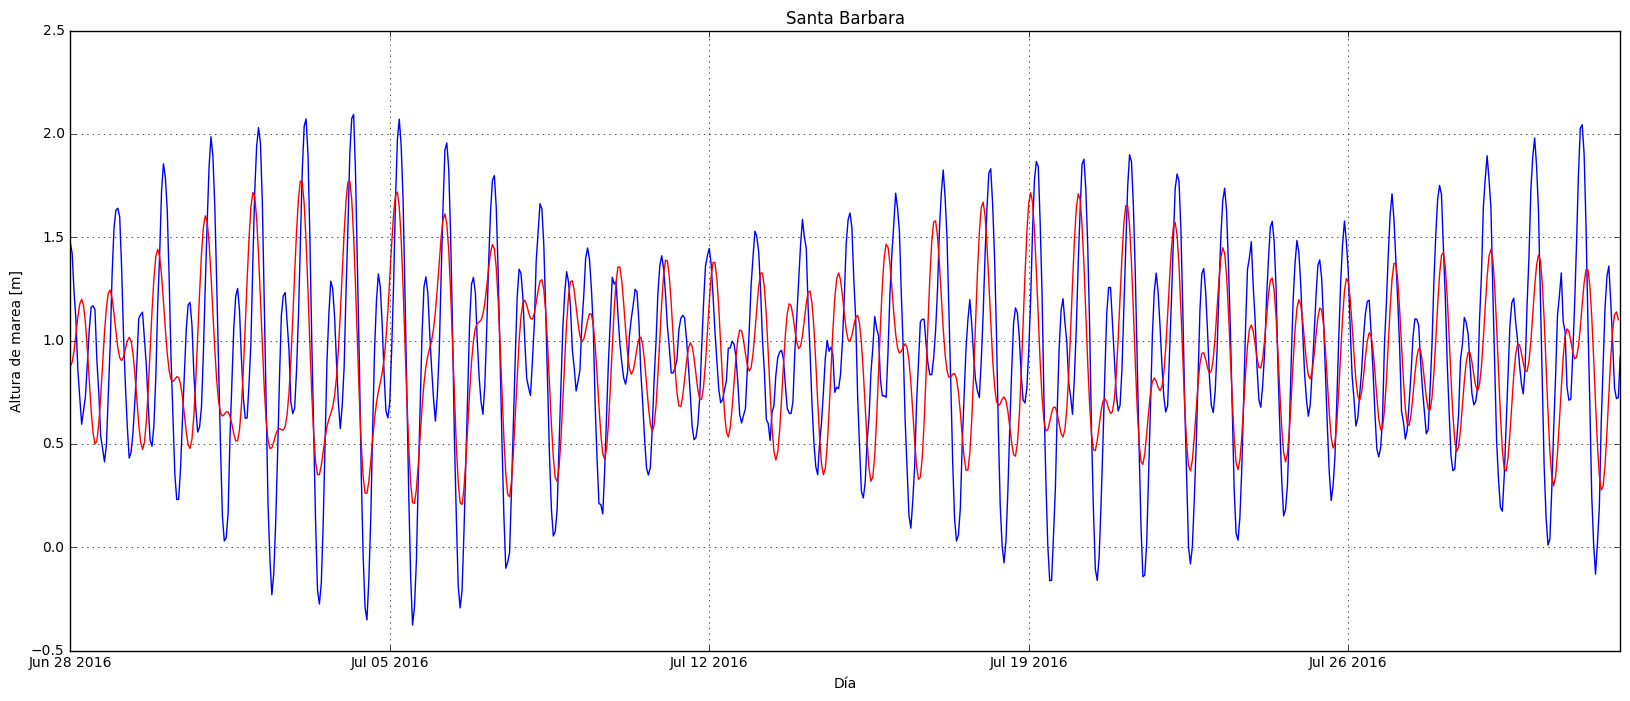

In [18]:

#mostrando la aproximación y la real
plt.plot(df[u'Date Time'], df[u' Water Level'], 'b', label ="Altura")
plt.plot(df['Date Time'], g(df['T']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp('2016-06-28 00:00:00'), pd.Timestamp('2016-07-31 23:00:00'))
plt.ylabel('Altura de marea [m]')
plt.xlabel('Día')
plt.title('Santa Barbara')
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()



In [19]:
#error:
y_0=df[' Water Level']
y_1=g(df['T'])

In [20]:
E= np.sum(abs(y_0-y_1)**2) / np.sum(np.abs(y_0)**2)
E

0.1700841604071165